# Train ADAGE models on RNAseq data

### Georgia Doing 2021

This notebook walks through the training of an RNAseq-based ADAGE model as a continuation of analyses from last year (2021_06_eADAGE_adapt/seqADAGE).

Since then we have downloaded a new compendium of RNAseq data and aligned it to the PAO1 and PA14 reference genomes using prokarytoic-optimized parameters.
(https://github.com/hoganlab-dartmouth/pa-seq-compendia)

The main objectives are to train models, take a first look and save the models for further analysis on forthcoming notebooks
1. Load compendia
2. Train and save models
3. Visualize first-look plots

### 0. Setup

In [1]:
import run_count_autoencoder
import run_model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imp import reload
import Adage

In [55]:
# for dev purposes, while updating run_model.py need to reload
sns.reset_orig()
reload(run_count_autoencoder)
reload(run_model)
reload(Adage)

<module 'Adage' from '/Users/georgia/Dropbox (Hogan Lab)/Digital_notebook/2021_04_23_seqADAGE/seqADAGE/Py/Adage.py'>

### 1. Load Compendia

In [3]:
array_comp = np.loadtxt(open('../data_files/train_set_normalized_no_names.csv', "rb"),delimiter=',',skiprows = 1)
a_gene_num = np.size(array_comp, 0)
a_samp_num = np.size(array_comp, 1)
print(a_gene_num, a_samp_num)

5549 950


In [4]:
seq_comp = np.loadtxt(open('../data_files/pao1_aligned_rnaseq_compendium_zp2_MRnorm_log_01_no_gene_names.csv', "rb"),delimiter=',',skiprows = 1)
s_gene_num = np.size(seq_comp, 0)
s_samp_num = np.size(seq_comp, 1)
print(s_gene_num, s_samp_num)

5563 2766


<AxesSubplot:ylabel='Density'>

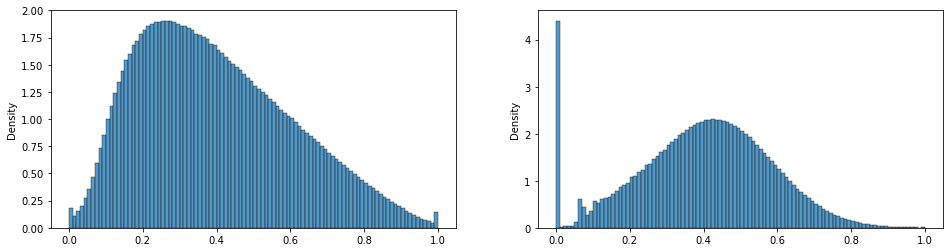

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16 ,4))
sns.histplot(array_comp.flatten(), stat='density', binwidth=.01,ax=ax1)
sns.histplot(seq_comp.flatten(), stat='density', binwidth=.01,ax=ax2)

### 2. Train Models

In [51]:
ma = run_model.run_model('../data_files/train_set_normalized.csv',lr=.01,seed=560,kl1=0,kl2=0,act = 'sigmoid', tied = True, epochs=1, init='glorot_uniform', batch_size=10)
np.shape(ma.weights)

test
tensorflow
(5549, 950)
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 300)               1665000   
_________________________________________________________________
module_wrapper_24 (ModuleWra (None, 5549)              1665000   
Total params: 1,665,000
Trainable params: 1,665,000
Non-trainable params: 0
_________________________________________________________________
86/86 [==============================] - 2s 18ms/step - loss: 0.6963 - val_loss: 0.6961
(5549, 300)


(5549, 300)

In [63]:
ma = run_model.run_model('../data_files/train_set_normalized.csv',lr=.01,seed=560,kl1=0,kl2=0,act = 'sigmoid', tied = True, epochs=50, init='glorot_uniform', batch_size=10)


test
tensorflow
(5549, 950)
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 300)               1665000   
_________________________________________________________________
module_wrapper_28 (ModuleWra (None, 5549)              1665000   
Total params: 1,665,000
Trainable params: 1,665,000
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
86/86 [==============================] - 3s 21ms/step - loss: 2.8541 - val_loss: 2.7033
Epoch 2/50
86/86 [==============================] - 2s 19ms/step - loss: 2.6604 - val_loss: 2.6170
Epoch 3/50
86/86 [==============================] - 2s 18ms/step - loss: 2.5942 - val_loss: 2.5703
Epoch 4/50
86/86 [==============================] - 1s 17ms/step - loss: 2.5602 - val_loss: 2.5454
Epoch 5/50
86/86 [==============================] - 2s 18ms/step - loss: 2.5354 -

In [22]:
ma = run_model.run_model('../data_files/train_set_normalized.csv',lr=.01,seed=560,kl1=0,kl2=0,act = 'sigmoid', tied = True, epochs=50, init='glorot_uniform', batch_size=10)
m = run_model.run_model('../data_files/pao1_aligned_rnaseq_compendium_zp2_MRnorm_log_01.csv',lr=.01,seed=460,kl1=1e-10,kl2=1e-1,act = 'sigmoid', tied = True, epochs=50, init='glorot_uniform', batch_size=10)
mc = run_count_autoencoder.run_count_autoencoder('../data_files/pao1_aligned_rnaseq_compendium_zp2_MRnorm_log_01.csv',lr=.01,seed=460,kl1=1e-10,kl2=1e-1, act = 'relu', tied = True, epochs=50, init='glorot_uniform', batch_size=10)

tf_adage = Adage.Adage(ma.autoencoder, ma.history, ma.compendium)
tf_weights = np.array(pd.read_csv('../outputs/ADAGE_OG_weights.csv', header = None))
tf_cost = pd.read_csv('../outputs/ADAGE_OG_cost_log.csv')
tf_adage.weights = tf_weights
tf_adage.loss = tf_cost['cost']
tf_adage.set_hwg_cutoff(2.5).shape

test
tensorflow
(5549, 950)
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 300)               1665000   
_________________________________________________________________
module_wrapper_9 (ModuleWrap (None, 5549)              1665000   
Total params: 1,665,000
Trainable params: 1,665,000
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
86/86 [==============================] - 4s 38ms/step - loss: 2.7423 - val_loss: 2.5825
Epoch 2/50
86/86 [==============================] - 3s 33ms/step - loss: 2.5495 - val_loss: 2.5135
Epoch 3/50
86/86 [==============================] - 3s 34ms/step - loss: 2.5012 - val_loss: 2.4771
Epoch 4/50
86/86 [==============================] - 3s 33ms/step - loss: 2.4648 - val_loss: 2.4419
Epoch 5/50
86/86 [==============================] - 3s 34ms/step - loss: 2.4363 - 

249/249 [==============================] - 13s 52ms/step - loss: 1.2620 - val_loss: 4.9428
Epoch 20/50
249/249 [==============================] - 14s 57ms/step - loss: 3.4484 - val_loss: 2.3585
Epoch 21/50
249/249 [==============================] - 13s 52ms/step - loss: 1.8166 - val_loss: 1.4715
Epoch 22/50
249/249 [==============================] - 12s 47ms/step - loss: 1.2468 - val_loss: 1.0796
Epoch 23/50
249/249 [==============================] - 12s 49ms/step - loss: 0.9978 - val_loss: 0.9336
Epoch 24/50
249/249 [==============================] - 13s 52ms/step - loss: 0.9012 - val_loss: 0.8740
Epoch 25/50
249/249 [==============================] - 12s 48ms/step - loss: 0.8644 - val_loss: 0.8526
Epoch 26/50
249/249 [==============================] - 12s 49ms/step - loss: 0.8496 - val_loss: 0.8410
Epoch 27/50
249/249 [==============================] - 12s 47ms/step - loss: 0.8443 - val_loss: 0.8419
Epoch 28/50
249/249 [==============================] - 12s 46ms/step - loss: 0.8427 -

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/50
249/249 [==============================] - 26s 85ms/step - loss: 14.6761 - val_loss: 3.5385
Epoch 2/50
249/249 [==============================] - 21s 84ms/step - loss: 8.3809 - val_loss: 5.0519
Epoch 3/50
249/249 [==============================] - 20s 80ms/step - loss: 8.0756 - val_loss: 7.8705
Epoch 4/50
249/249 [==============================] - 20s 80ms/step - loss: 8.8285 - val_loss: 9.6596
Epoch 5/50
249/249 [==============================] - 20s 80ms/step - loss: 8.2543 - val_loss: 4.0157
Epoch 6/50
249/249 [==============================] - 20s 81ms/step - loss: 8.8199 - val_loss: 7.8850
Epoch 7/50
249/249 [==============================] - 20s 80ms/step - loss: 8.5560 - val_loss: 25.3735
Epoch 8/50
249/249 [==============================] - 20s 82ms/step - loss: 8.6320 - val_loss: 8.4529
Epoch 9/50
249/249 [==============================] - 20s 82ms/step - loss: 7.7705 - val_loss: 18.6547
Epoch 10/50
249/249 [==============================] - 20s 80ms/step - loss: 8.

(5549, 600)

### 3. First-look plots

#### Training Loss Curves

[Text(0.5, 1.0, 'RNAseq DCA (keras code)')]

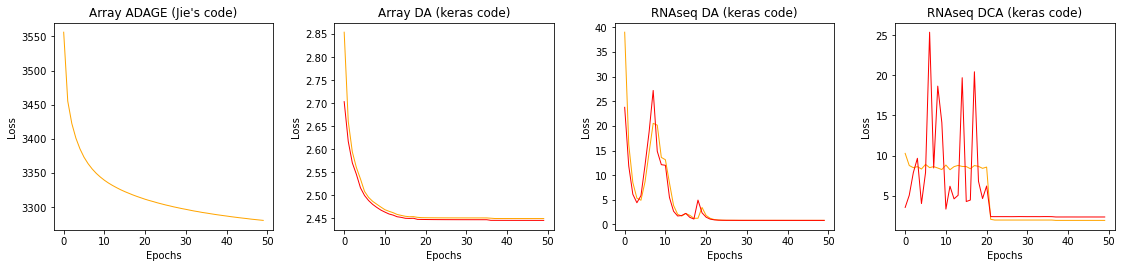

In [65]:
model_dict = {
    "t_adage": tf_adage,
    "k_adage": ma,
    "k_da" : m,
    "k_dca": mc
}
fig, ax = plt.subplots(1, 4,figsize=(16 ,4))
fig.tight_layout(pad=3.0)

name = 't_adage'
model_temp = model_dict[name]
ax[0].plot(list(range(0,50)), model_temp.loss[0:50], linewidth=1, markersize=2, color = 'orange')
ax[0].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
ax[0].set(title = "Array ADAGE (Jie's code)")

name = 'k_adage'
model_temp = model_dict[name]
ax[1].plot(list(range(0,50)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
ax[1].plot(list(range(0,50)), model_temp.val_loss, linewidth=1, markersize=2, color = 'red')
ax[1].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
ax[1].set(title = "Array DA (keras code)")

name = 'k_da'
model_temp = model_dict[name]
ax[2].plot(list(range(0,50)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
ax[2].plot(list(range(0,50)), model_temp.val_loss, linewidth=1, markersize=2, color = 'red')
ax[2].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
ax[2].set(title = "RNAseq DA (keras code)")

name = 'k_dca'
model_temp = model_dict[name]
ax[3].plot(list(range(0,50)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
ax[3].plot(list(range(0,50)), model_temp.val_loss, linewidth=1, markersize=2, color = 'red')
ax[3].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
ax[3].set(title = "RNAseq DCA (keras code)")

#### Node Weight Distributions

[Text(0.5, 1.0, 'RNAseq DCA (keras code)')]

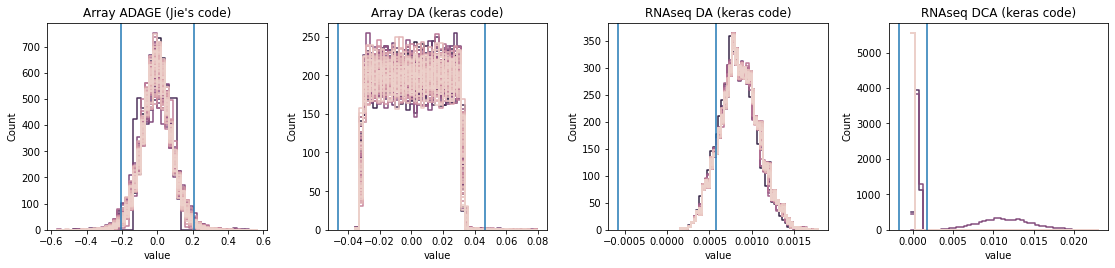

In [66]:
model_dict = {
    "t_adage": tf_adage,
    "k_adage": ma,
    "k_da" : m,
    "k_dca": mc
}

fig, ax = plt.subplots(1, 4,figsize=(16 ,4))
fig.tight_layout(pad=3.0)

name = 't_adage'
model_temp = model_dict[name]
sns.histplot(pd.melt(pd.DataFrame(model_temp.weights[:,:])),
             x='value', hue='variable', legend=False,element='step',fill=False,
             ax=ax[0], bins=50)
ax[0].axvline(x = np.std(model_temp.weights)*2.5)
ax[0].axvline(x = np.std(model_temp.weights)*-2.5)
ax[0].set(title = "Array ADAGE (Jie's code)")

name = 'k_adage'
model_temp = model_dict[name]
sns.histplot(pd.melt(pd.DataFrame(model_temp.weights[:,:])),
             x='value', hue='variable', legend=False,element='step',fill=False,
             ax=ax[1], bins=50)
ax[1].axvline(x = np.std(model_temp.weights)*2.5)
ax[1].axvline(x = np.std(model_temp.weights)*-2.5)
ax[1].set(title = "Array DA (keras code)")



name = 'k_da'
model_temp = model_dict[name]
sns.histplot(pd.melt(pd.DataFrame(model_temp.weights[:,:])),
             x='value', hue='variable', legend=False,element='step',fill=False,
             ax=ax[2], bins=50)
ax[2].axvline(x = np.std(model_temp.weights)*2.5)
ax[2].axvline(x = np.std(model_temp.weights)*-2.5)
ax[2].set(title = "RNAseq DA (keras code)")



name = 'k_dca'
model_temp = model_dict[name]
sns.histplot(pd.melt(pd.DataFrame(model_temp.weights[:,:])),
             x='value', hue='variable', legend=False,element='step',fill=False,
             ax=ax[3], bins=50)
ax[3].axvline(x = np.std(model_temp.weights)*2.5)
ax[3].axvline(x = np.std(model_temp.weights)*-2.5)
ax[3].set(title = "RNAseq DCA (keras code)")




### Wrap-up thoughts

These models do not appear to be training, even that trained on array data. This is frustrating since last year this same code trained models on both the array and refine.bio rnaseq compendia OK. Since then the only changes have been those involved in the update of python and keras/tensorflow. 


These models seem to be training faster than the ones last year and I wonder if that is an indication of a change in the datatypes, loss function or optimizer. 